## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [130]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [131]:
def Freshen(entryX,df):
    if 'Fresh' in str(df.loc[:,'Form']):
        FreshAisle = df.loc[df.loc[:,'Form'] == 'Fresh1']
        return FreshAisle

In [132]:
def fruitx(fruit):
    fruity = pd.read_excel('assignment3_data/fruit/' + fruit, header = 1)
    return fruity

In [133]:
temp_table = pd.DataFrame(columns = ['Type','Food','Form', 'Average retail price ', 'Unnamed: 2', 'Preparation',
                                     'Size of a ', 'Unnamed: 5', 'Average price'])
fruit_names = []
for fruit in os.listdir('assignment3_data/fruit/'):
    if fruit[0] == '~':
        continue
    fruity = fruitx(fruit)
    fruity.replace(r'^\s+$', np.nan, regex=True, inplace = True)   #replace cells containing only spaces with NANs
    fruity = fruity.dropna(axis = 1, how = 'all')        #drop columns with only NANs
    if isinstance(Freshen(fruit[:-5],fruity), pd.DataFrame):
        fresh_fruit = Freshen(fruit[:-5],fruity)
        fresh_fruit.dropna(axis = 0, how = 'all')
        if fresh_fruit.shape[0]==0:
            continue
        temp_table = pd.concat([temp_table,fresh_fruit],ignore_index=True)
        fruit_names.append(fruit[:-5])
    else:
        continue


In [134]:
temp_table.Food = fruit_names
temp_table.Type = "Fruit"
temp_table=temp_table.drop(["Unnamed: 2","Unnamed: 5"],axis=1)
temp_table.columns = ["price_per_lb", "price_per_cup", "food", "form", "yield", "lb_per_cup", "type"]


In [135]:
fruit_table = temp_table.loc[:,["type", "food","form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]]

In [136]:
fruit_table

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Fruit,apples,Fresh1,0.422373,0.9,0.242508,1.567515
1,Fruit,apricots,Fresh1,1.1891,0.93,0.363763,3.040072
2,Fruit,bananas,Fresh1,0.292965,0.64,0.330693,0.566983
3,Fruit,blueberries,Fresh1,1.59318,0.95,0.31967,4.734622
4,Fruit,cantaloupe,Fresh1,0.3938,0.51,0.374786,0.535874
5,Fruit,cherries,Fresh1,1.33455,0.92,0.341717,3.592990
6,Fruit,grapefruit,Fresh1,0.848278,0.49,0.462971,0.897802
7,Fruit,grapes,Fresh1,0.721266,0.96,0.330693,2.093827
8,Fruit,honeydew,Fresh1,0.649077,0.46,0.374786,0.796656
9,Fruit,kiwi,Fresh1,1.03797,0.76,0.385809,2.044683


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

* My code deleted the tomato file before it could cause too many problems. I just openned it and saw why. Even though, on the surface, it looks like it has the same problem that Romaine lettuce and mushrooms have, it has an additional attribute makes it get cut out of the table before it can cause any more problems. While most things said "Fresh1", the fresh tomato row only says "Fresh." Therefore, my code saw no instances of "Fresh1" and skipped it all together. I hope that isn't a common problem in the veggie set. 

In [137]:
def vegx(veggie):
    veggie = pd.read_excel('assignment3_data/vegetables/' + veggie, header = 1)
    return veggie

In [138]:
temp_table = pd.DataFrame(columns = ['Type','Food','Form', 'Average retail price ', 'Unnamed: 2', 'Preparation',
                                     'Size of a ', 'Unnamed: 5', 'Average price'])
names = []
for veg in os.listdir('assignment3_data/vegetables/'):
    if veg[0] == '~':
        continue
    vegy = vegx(veg)
    vegy.replace(r'^\s+$', np.nan, regex=True, inplace = True)   #replace cells containing only spaces with NANs
    vegy = vegy.dropna(axis = 1, how = 'all')        #drop columns with only NANs
    if isinstance(Freshen(veg[:-5],vegy), pd.DataFrame):
        fresh_veggie = Freshen(veg[:-5],vegy)
        fresh_veggie.dropna(axis = 0, how = 'all')
        if fresh_veggie.shape[0]==0:
            continue
        temp_table = pd.concat([temp_table,fresh_veggie],ignore_index=True)
        names.append(veg[:-5])
    else:
        continue

In [139]:
temp_table.Food = names
temp_table.Type = "Vegetable"
temp_table=temp_table.drop(["Unnamed: 2","Unnamed: 5"],axis=1)
temp_table.columns = ["price_per_lb", "price_per_cup", "food", "form", "yield", "lb_per_cup", "type"]


In [140]:
veggie_table = temp_table.loc[:,["type", "food","form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]]

In [141]:
veggie_table

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Vegetable,acorn_squash,Fresh1,1.15536,0.458554,0.451948,1.172248
1,Vegetable,artichoke,Fresh1,2.27497,0.375309,0.385809,2.213050
2,Vegetable,asparagus,Fresh1,2.58227,0.493835,0.396832,3.213494
3,Vegetable,avocados,Fresh1,0.964886,0.740753,0.31967,2.235874
4,Vegetable,brussels_sprouts,Fresh1,0.890898,1.06,0.341717,2.763553
5,Vegetable,butternut_squash,Fresh1,0.787893,0.714,0.451948,1.244737
6,Vegetable,cauliflower,Fresh1,NaN,NaN,NaN,NaN
7,Vegetable,celery,Fresh1,NaN,NaN,NaN,NaN
8,Vegetable,collard_greens,Fresh1,0.650001,1.16,0.286601,2.630838
9,Vegetable,corn_sweet,Fresh1,1.8125,0.54,0.363763,2.690623


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [142]:
veggie_table = veggie_table.dropna()

In [143]:
pd.concat([fruit_table,veggie_table],axis = 0, ignore_index=True)

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,Fruit,apples,Fresh1,0.422373,0.9,0.242508,1.567515
1,Fruit,apricots,Fresh1,1.1891,0.93,0.363763,3.040072
2,Fruit,bananas,Fresh1,0.292965,0.64,0.330693,0.566983
3,Fruit,blueberries,Fresh1,1.59318,0.95,0.31967,4.734622
4,Fruit,cantaloupe,Fresh1,0.3938,0.51,0.374786,0.535874
5,Fruit,cherries,Fresh1,1.33455,0.92,0.341717,3.592990
6,Fruit,grapefruit,Fresh1,0.848278,0.49,0.462971,0.897802
7,Fruit,grapes,Fresh1,0.721266,0.96,0.330693,2.093827
8,Fruit,honeydew,Fresh1,0.649077,0.46,0.374786,0.796656
9,Fruit,kiwi,Fresh1,1.03797,0.76,0.385809,2.044683


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

__a.__ If we look at the dotplot, then the most expensive fruit is the Raspberry. The Blueberry is a distant distant second, followed closely by the Cherry, Pomegranite, and Apricot. The least expensive fruit per lb hands-down is the Watermelon, and that is probably because it is 90% water. Bananas are also rather cheap, followed by Cantaloupe, Apple, and Pineapple. (For the record, you cant eat the skin, crown, or core of a pineapple, so I think it's not so cheap as they make it seem.)

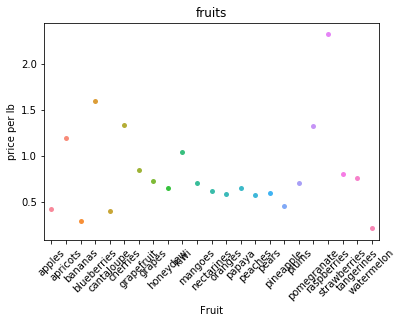

In [151]:
frable = fruit_table.copy()
frable.index = fruit_names
ax = sns.stripplot(x = frable["price_per_lb"].index, y = frable["price_per_lb"])
ax.set(title = "fruits", xlabel = "Fruit", ylabel = "price per lb")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

__b.__ As far as Vegetables compare to fruit, there is not a lot of difference. The patterns in this dotplot almost seem to mirror each other. However, the price-per-pound seems to vary more in vegetables than in fruit. However, that very well might me related to the fact that ther is one more fruit categories in the table than vegetables. (But one is really not a lot, so I wouldn't swear by that as a reason.) 

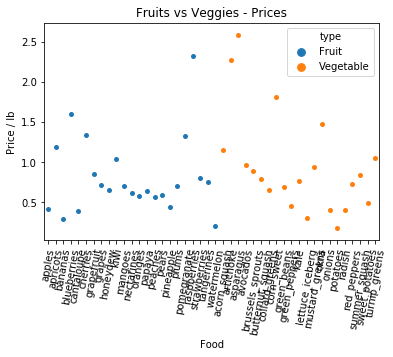

In [146]:
vable = veggie_table.copy()
vable.index = vable["food"]
fv= pd.concat([frable,vable],axis = 0)
ax = sns.stripplot(x = fv["price_per_lb"].index, y = fv["price_per_lb"],hue = fv["type"])
ax.set(title = "Fruits vs Veggies - Prices", xlabel = "Food", ylabel = "Price / lb")
ax.set_xticklabels(fv["food"], rotation = 80)

plt.show()

__c.__ They dont look to be distrubuted very differently. I noticed that there was some cheating going on though, becuase I'm pretty sure that avocados are fruits. In fact, I'm positive. Most of both groups is dispperesed most densely around the 0.5-1.0 marks. Watermelons stick out as an especially low price - to - weight ratio, however, I think that is mostly a result of how much they weigh. Avocados are very expensive. That's probably in part due to their value in other industries, such as oil-pressing and beauty products. They cost more because not all of it goes to the food market, and with that shock to negative supply, there needs to be a determent of demand. 

__d.__ I was completely expecting veggies to be noticibly cheaper than fruits. But I think I realised now that, per pound, they aren't. A lot of veggies, like spinach, get more credit because they are leafy and therefore look more voluminous for how massive they are than a fruit, like an apple for example. Potatoes, as I was expecting, were rediculously cheap.

__e.__ I expect the vegetables to provide the best cobination of price yield and nutrition. Probably some of the more dense root vegetables. Carots, beets, sweet potatoes. The leafy ones will be more nutritious, probably, but I am not a nutrition major. I the ones I did based on what I could decipher about how each one rang up cost per lb, and how healthy my mom told me they were when I was a child. 